# Hierarchial Clustering Outline
### Using Iris Dataset off Kaggle for Practice

## Obtain

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn libraries
from sklearn import preprocessing
from sklearn.decomposition import PCA

#hierarchial clustering libraries
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 



In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/laurenesser/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and wi

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Scrub

In [3]:
#set id to index
df = df.set_index(['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

---

### Practice witholding points in order to map them to existing clusters based on centroid. 


In [8]:
df_new_info = df.loc[146:, :]
df_new_info.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df_without = df.loc[:145, :]
df_without.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
141,6.7,3.1,5.6,2.4,Iris-virginica
142,6.9,3.1,5.1,2.3,Iris-virginica
143,5.8,2.7,5.1,1.9,Iris-virginica
144,6.8,3.2,5.9,2.3,Iris-virginica
145,6.7,3.3,5.7,2.5,Iris-virginica


**Normalize Numerical and Categorical Columns**

In [10]:
num_cols = df_without.select_dtypes('number')
num_cols.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [11]:
x = num_cols.values
Standard_scaler = preprocessing.StandardScaler()
x_scaled = Standard_scaler.fit_transform(x)
num_cols_scaled = pd.DataFrame(x_scaled, index = num_cols.index, 
                              columns = num_cols.columns)
num_cols_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,-0.872576,1.016855,-1.306248,-1.282803
2,-1.112659,-0.129677,-1.306248,-1.282803
3,-1.352742,0.328936,-1.362804,-1.282803
4,-1.472783,0.099630,-1.249692,-1.282803
5,-0.992618,1.246162,-1.306248,-1.282803


---

In [12]:
cat_cols = df_without.select_dtypes('object')
cat_cols.head()

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa


In [13]:
cat_cols.nunique()

Species    3
dtype: int64

In [14]:
#OHE
cat_cols_ohe = pd.get_dummies(cat_cols, prefix = 'Species')
cat_cols_ohe.head()

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [15]:
df_scaled = pd.merge(num_cols_scaled, cat_cols_ohe, left_index = True,
              right_index = True)
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,,,,,
1,-0.872576,1.016855,-1.306248,-1.282803,1,0,0
2,-1.112659,-0.129677,-1.306248,-1.282803,1,0,0
3,-1.352742,0.328936,-1.362804,-1.282803,1,0,0
4,-1.472783,0.099630,-1.249692,-1.282803,1,0,0
5,-0.992618,1.246162,-1.306248,-1.282803,1,0,0


## Explore

**Answers to Questions:**
1. We will use categorical within the real model after using our inverse_mean_absolute_error function. (usually models us chi-squared but since we have zero values inverse_mean_absolute_error will function better)


2. No train, test split on unsupervised learning


### With Categorical

In [16]:
#select columns
X = df_scaled.values

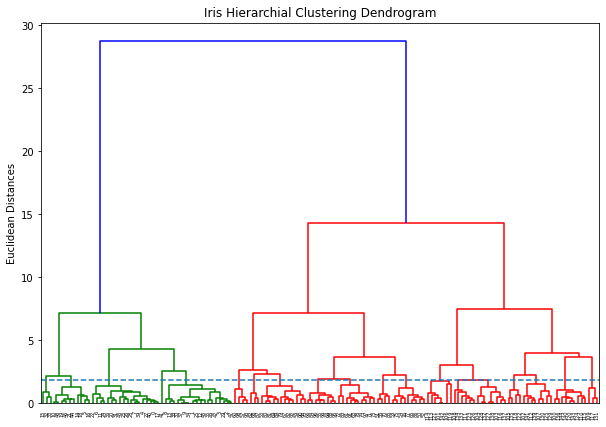

In [17]:
#plot dengrogram
plt.figure(figsize=(10, 7))  
plt.title('Iris Hierarchial Clustering Dendrogram')
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(linestyle='--', y=1.8) 
plt.ylabel('Euclidean Distances')
plt.show()

In [18]:
#clustering
cluster = AgglomerativeClustering(n_clusters = 3, 
                                 affinity = 'euclidean',
                                 linkage = 'ward')
cluster.fit(X)
labels = cluster.labels_

In [19]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Clusters')

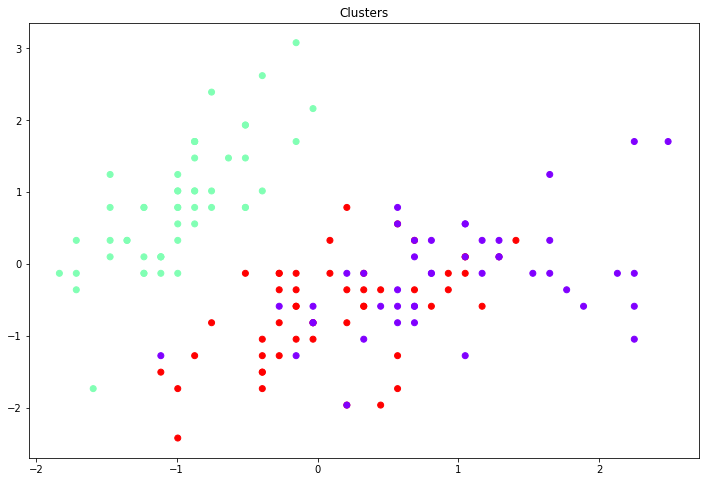

In [20]:
#visualize clusters
plt.figure(figsize = (12,8))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap = 'rainbow')
plt.title('Clusters')

### WITHOUT CATEGORICAL

In [16]:
X = df_scaled.iloc[:, 0:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,-0.872576,1.016855,-1.306248,-1.282803
2,-1.112659,-0.129677,-1.306248,-1.282803
3,-1.352742,0.328936,-1.362804,-1.282803
4,-1.472783,0.099630,-1.249692,-1.282803
5,-0.992618,1.246162,-1.306248,-1.282803


 - With PCA I can choose the number of components, whiten, svd_solver (auto, full, arpack, randomized), tol, iterated_power if needed

In [17]:
pca = PCA()
pca_comp = pca.fit_transform(X)

print('Original Shape: ', X.shape)
print('Transformed Shape: ', pca_comp.shape)

Original Shape:  (145, 4)
Transformed Shape:  (145, 4)


In [18]:
print('PCA Components: ')
print(pca.components_)
print('\n')

print('Explained Variance Ratio: ')
print(pca.explained_variance_ratio_)
print('\n')

print('Singular Values: ')
print(pca.singular_values_)


PCA Components: 
[[ 0.52117195 -0.26583808  0.58100134  0.56581566]
 [ 0.38014767  0.92263065  0.02118175  0.06157735]
 [-0.71713419  0.24987113  0.13855225  0.63567779]
 [-0.26379177  0.12508886  0.80174314 -0.52151186]]


Explained Variance Ratio: 
[0.72897615 0.23046071 0.03568358 0.00487956]


Singular Values: 
[20.56225102 11.56145382  4.54933778  1.68230326]


In [19]:
pca_df = pd.DataFrame(pca_comp, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4
0,-2.209843,0.499814,-0.116596,-0.020903
1,-2.030175,-0.649279,-0.230909,-0.100989
2,-2.310076,-0.318613,0.048020,-0.025633
3,-2.245961,-0.573416,0.092481,0.068036
4,-2.333363,0.665745,0.026787,0.039447


# PCA Visuals

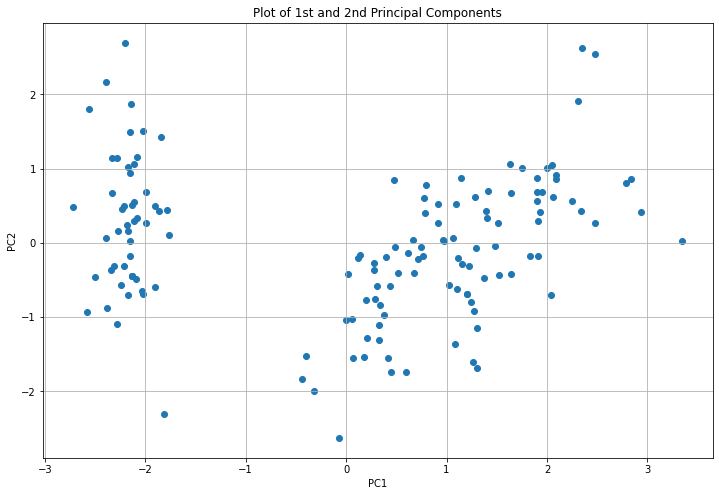

In [20]:
#comparing pca 1 and 2
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Plot of 1st and 2nd Principal Components')
ax.scatter(pca_comp[:, 0]
          , pca_comp[:, 1])
ax.grid()

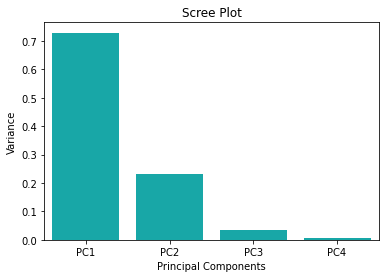

In [21]:
df_scree = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'Principal Components':['PC1','PC2','PC3','PC4']})
ax = sns.barplot(x='Principal Components',y="Variance", 
           data=df_scree, color="c").set_title('Scree Plot')


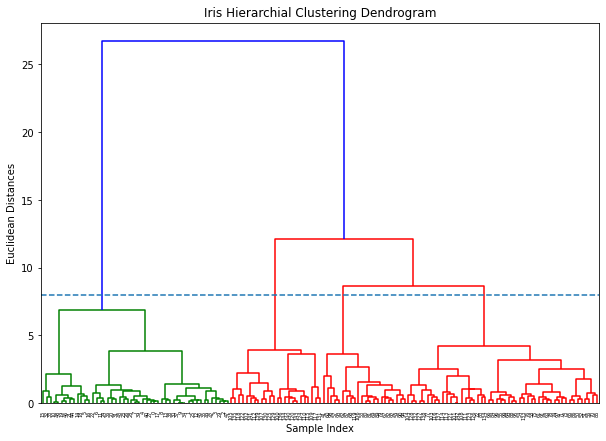

In [22]:
#plot dengrogram
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(pca_comp, method='ward'))
plt.axhline(linestyle='--', y=8) 
plt.ylabel('Euclidean Distances')
plt.xlabel('Sample Index')
plt.title('Iris Hierarchial Clustering Dendrogram')

plt.show()

In [23]:
cluster = AgglomerativeClustering(n_clusters = 3, 
                                 affinity = 'euclidean',
                                 linkage = 'ward')
cluster.fit(pca_comp)
labels = cluster.labels_

In [33]:
#from stackover flow. Stated to use just first two arrays to mark centroids
def to_codebook(X, part):
    """
    Calculates centroids according to flat cluster assignment

    Parameters
    ----------
    X : array, (n, d)
        The n original observations with d features

    part : array, (n)
        Partition vector. p[n]=c is the cluster assigned to observation n

    Returns
    -------
    codebook : array, (k, d)
        Returns a k x d codebook with k centroids
    """
    codebook = []

    for i in range(part.min(), part.max()+1):
        codebook.append(X[part == i].mean(0))

    return np.vstack(codebook)

In [73]:
centroids_try = to_codebook(pca_comp, labels)
centroids_try

array([[ 0.75034566, -0.5310226 ,  0.02421661,  0.02164917],
       [-2.17188052,  0.34071927, -0.03713086, -0.01043496],
       [ 2.18321907,  0.89743261,  0.00315901, -0.04364281]])

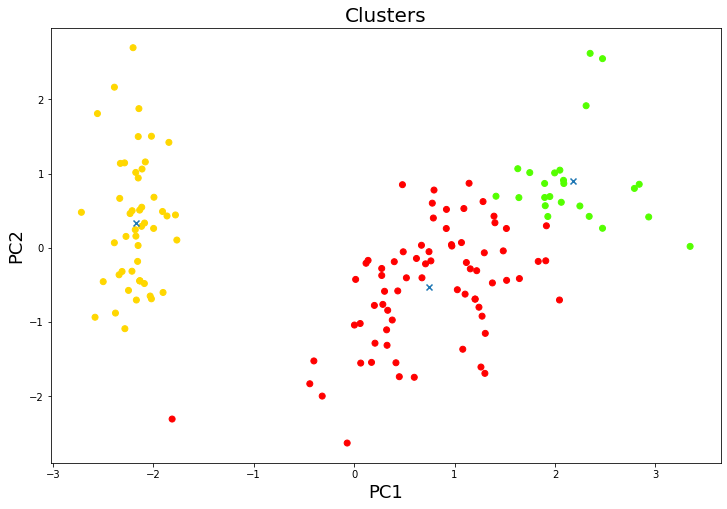

In [77]:
#visualize clusters
plt.figure(figsize = (12,8))
plt.scatter(pca_comp[:,0], pca_comp[:,1], c=cluster.labels_, cmap = 'prism')
plt.scatter(centroids_try[:, 0], centroids_try[:, 1], marker = "x")
plt.title('Clusters', fontsize = 20)
plt.xlabel('PC1', fontsize = 18)
plt.ylabel('PC2', fontsize = 18);

---

- centroids out of cluster object. (cut off 3 clusters) Off the trained object out of the hierarchial clustering- if struggle can use kmeans.
- think of pca just as visualization.


---

## Practice Adding New Information

In [42]:
df_new_info.iloc[:, 0:4].values

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [43]:
#normalize new data in the same way
x = df_new_info.iloc[:, 0:4].values
Standard_scaler = preprocessing.StandardScaler()
x_scaled = Standard_scaler.fit_transform(x)
new_scaled = pd.DataFrame(x_scaled, index = df_new_info.iloc[:, 0:4].index, 
                              columns = df_new_info.iloc[:, 0:4].columns)
new_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
146,1.400699,0.070014,0.150756,1.165543
147,-0.073721,-1.680336,-1.356801,-0.777029
148,0.663489,0.070014,0.150756,-0.291386
149,-0.442326,1.470294,1.658312,1.165543
150,-1.548141,0.070014,-0.603023,-1.262672


In [80]:
model = cluster.fit(pca_comp)

model.fit_predict(new_scaled)

array([1, 0, 1, 2, 0])